#### Problem Description
Create a word-document matrix (A) from a text dataset. If the vocabulary (set of unique words) size is M and the number of documents is N, then the size of this matrix will be M X N. Use numpy data structures to create and manipulate this matrix.

In [1]:
from keras.preprocessing.text import Tokenizer
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm, mlab
from numpy import dot
from numpy.linalg import norm

Using TensorFlow backend.


In [3]:
tokenizer = Tokenizer()
for doc in os.listdir("docs/"):
    f = open("docs/"+doc, "r", encoding="latin1")
    s = f.read()
    tokenizer.fit_on_texts([s])
    f.close()

len(tokenizer.word_index)

1186

In [4]:
docs = os.listdir("docs/")
occurences = np.zeros((len(tokenizer.word_index), len(docs)), dtype = int)

In [6]:
for i in range(len(docs)):
    doc = docs[i]
    tmp_tokenizer = Tokenizer()
    f = open("docs/"+doc, "r", encoding="latin1")
    s = f.read()
    tmp_tokenizer.fit_on_texts([s])
    for word in tmp_tokenizer.word_index:
        index = tokenizer.word_index[word] - 1
        occurences[index, i]=tmp_tokenizer.word_counts[word]

occurences.shape

(1186, 20)

In [7]:

for i in range(1,occurences.shape[0]):
    word = tokenizer.index_word[i]
    if tokenizer.word_counts[word]<10:
        continue
    print("%2s"%i, "%5s" %word, end = "")
    frmt = "{:>4}"*len(occurences[i-1])
    print(frmt.format(*occurences[i-1]))

 1   the   7   7  11   4   5   7  12   9  10   7  11   6  10  31   9   8   9   9   7  11
 2    to   2   9   4   1  10   9   6   5   2   7  13   6   3   2   3   2   4   9   9   3
 3     a   2   3   3   4   9   3   1   6   3   6   4   4   1   7   8   0   6   4   3   4
 4    of   5   0   3   4   4   1   5   2   4   1   5   1   1  11   4   6   5   5   0   5
 5    in   2   3   1   2   7   4   4   2   5   1   1   2   4   8   5   1   2   4   3   4
 6   and   4   1   5   5   1   5   1   1   7   1   2   6   5   2   3   3   3   2   1   1
 7  that   3   5   3   3   4   1   2   2   0   1   3   0   0   2   0   2   0   1   5   3
 8    on   0   3   3   1   0   1   4   1   4   1   1   0   3   0   3   1   5   3   3   0
 9   for   0   2   0   1   3   1   2   1   2   1   2   3   0   0   4   1   0   1   2   1
10    is   1   2   1   1   4   3   1   2   0   0   0   2   0   3   0   1   0   2   2   0
11    be   1   3   1   0   2   2   2   2   0   0   1   0   0   2   1   0   0   1   3   1
12    as   0   0   0 

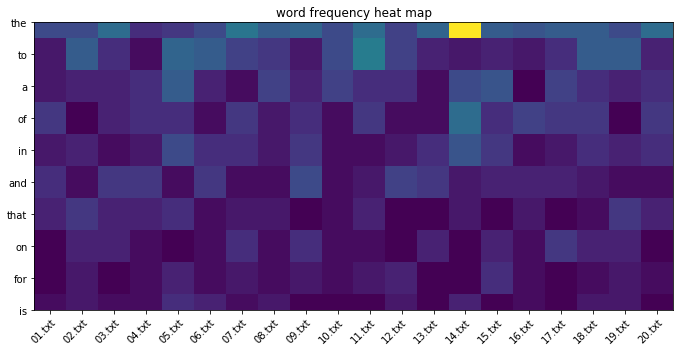

In [8]:
# heat map based on frequency of words using 
num = 10 

fig, ax = plt.subplots()
im = ax.imshow(occurences[:num, ])

ax.set_xticks(np.arange(len(docs)))
ax.set_yticks(np.arange(num))
ax.set_xticklabels(docs)
ax.set_yticklabels([*tokenizer.word_index][:num])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

ax.set_title("word frequency heat map")
fig.tight_layout()
fig.set_size_inches(num, 10.5)
plt.show()

In [9]:
#tf idf scores of each word from occurence matrix
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(occurences.transpose())
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': [*tokenizer.word_index], 'weight': weights})
weights_df.head()

,term,weight
0,the,0.228845
1,to,0.136114
2,a,0.103470
3,of,0.096021
4,in,0.077501


In [11]:
#cosine similarity of 10.txt with all docs then chosing top 3
doc1 = docs.index("10.txt")
cos_sim_scores = []
for i in range(len(docs)):
    doc = docs[i]
    a = occurences[:,i]
    b = occurences[:,doc1]
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    cos_sim_scores.append(cos_sim)

list1, list2 = zip(*sorted(zip(cos_sim_scores, docs), reverse = True))

print(["{0:.4f}".format(list1[i]) for i in range(0,4)])
print(list2[0:4])

['1.0000', '0.5996', '0.5274', '0.4841']
('10.txt', '06.txt', '11.txt', '19.txt')


In [12]:
#common words matrix
common_matrix = np.zeros((len(docs), len(docs)), dtype = int)
for w_index in tokenizer.index_word:
    for i in range(len(docs)):
        for j in range(i, len(docs)):
            if occurences[w_index-1, i] >0 and occurences[w_index-1, j] >0:
                common_matrix[i,j] += 1
                common_matrix[j,i] += 1

pd.DataFrame(common_matrix, index=docs, columns=docs)

,01.txt,02.txt,03.txt,04.txt,05.txt,06.txt,07.txt,08.txt,09.txt,10.txt,11.txt,12.txt,13.txt,14.txt,15.txt,16.txt,17.txt,18.txt,19.txt,20.txt
01.txt,132,14,14,13,15,16,15,15,18,10,12,12,9,20,11,16,8,14,14,15
02.txt,14,186,20,16,22,25,16,20,12,22,16,13,14,16,17,17,11,21,93,18
03.txt,14,20,180,13,18,17,19,19,8,15,15,13,16,19,13,17,12,16,20,17
04.txt,13,16,13,200,18,17,13,17,14,13,17,14,17,21,13,12,13,19,16,16
05.txt,15,22,18,18,222,22,19,23,10,15,18,20,17,19,20,18,12,26,22,21
06.txt,16,25,17,17,22,224,16,16,13,40,18,16,13,20,14,17,13,21,25,20
07.txt,15,16,19,13,19,16,232,23,12,16,14,22,25,23,17,17,12,19,16,23
08.txt,15,20,19,17,23,16,23,204,16,15,20,12,18,20,22,16,12,31,20,23
09.txt,18,12,8,14,10,13,12,16,186,14,13,12,14,19,20,12,12,13,12,16
10.txt,10,22,15,13,15,40,16,15,14,200,18,15,14,19,14,18,11,17,22,19
